This code will help us answer our research question:
2.	How does development and morphometry (area, depth, residence time, headwater/throughflow) relate to status and trends?
	2a )What comparisons in physical/chemical parameter data can be made across lakes of similar features?
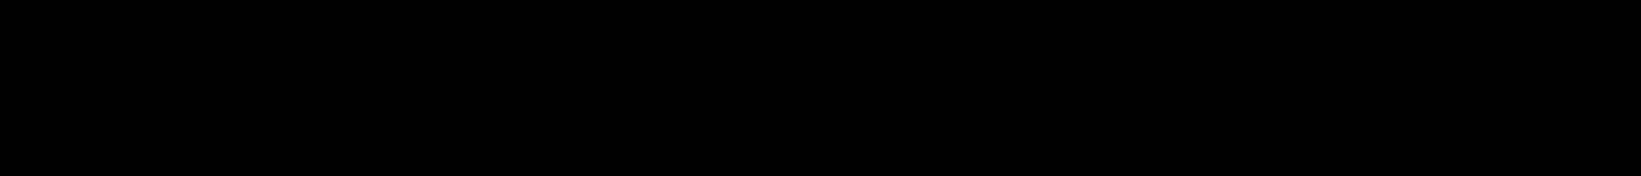
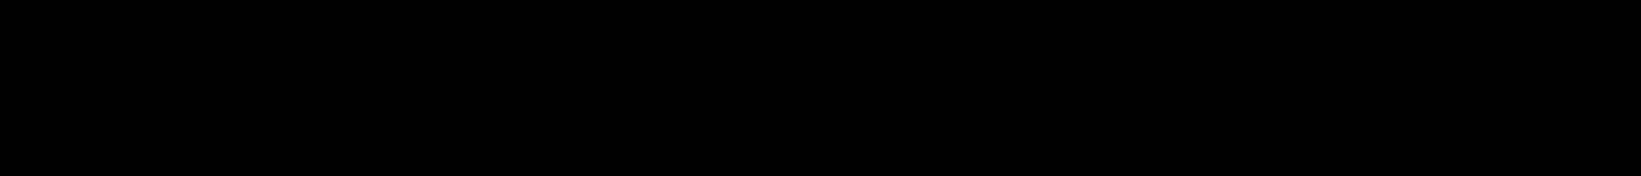

In [1]:
#Importing lib's
import pandas as pd
import numpy as np
from scipy.stats import linregress
import os

In [2]:
#Input and Output paths
cleaned_file = r"S:\Sem_4\Output\cleaned_limnology_data.xlsx"
cha_file = r"S:\Sem_4\CHA_Reports.xlsx"
output_file = r"S:\Sem_4\Output\enriched_lake_data.xlsx"
trends_file = r"S:\Sem_4\Output\lake_trends_summary.xlsx"

In [3]:
#Load the data
df_lim = pd.read_excel(cleaned_file)

df_dev = pd.read_excel(cha_file, sheet_name="Location and Development Detail")
df_morph = pd.read_excel(cha_file, sheet_name="Morphometric Features")

In [4]:
#Lets change the column names and standardize them
df_dev   = df_dev.rename(columns={'Lake': 'lake_name', 'Number of Properties': 'num_properties',
                                 'Capacity Status (2016)': 'capacity_status_2016'})

df_morph = df_morph.rename(columns={'Lake': 'lake_name', 'Surface Area (ha)': 'surface_area_ha',
                                   'Watershed Area (ha)': 'watershed_area_ha',
                                   'Maximum Depth (m)': 'max_depth_m', 'Mean Depth (m)': 'mean_depth_m',
                                   'Total Lake Volume (10^6 m^3)': 'volume_10e6_m3'})

In [5]:
#Now lets clean our data so we can easily merge them
df_lim['lake_name'] = df_lim['lake_name'].str.title().str.replace('_', ' ')

df_dev['lake_name'] = df_dev['lake_name'].str.title().str.replace('_', ' ')
df_morph['lake_name'] = df_morph['lake_name'].str.title().str.replace('_', ' ')

In [6]:
#Averaging data per lake
df_lim_agg = df_lim.groupby('lake_name', as_index=False).mean(numeric_only=True)

In [7]:
#Merging all the data
merged_df = pd.merge(df_lim_agg, df_dev, on='lake_name', how='outer')
df_enriched = pd.merge(merged_df, df_morph, on='lake_name', how='outer')

In [8]:
print(df_enriched)

               lake_name   latitude  longitude  lake_depth_(in_metres)  \
0             Allen Lake  45.122057 -78.248768               24.825000   
1          Big Hawk Lake  45.162589 -78.730294               52.785714   
2      Big Straggle Lake  45.117924 -78.197872               16.971429   
3            Bitter Lake        NaN        NaN               10.000000   
4               Bob Lake  44.911301 -78.779594               44.042857   
5          Boshkung Lake  45.060671 -78.728547               53.783333   
6           Burdock Lake        NaN        NaN               10.000000   
7             Cedar Lake  45.035888 -78.259210               17.512500   
8           Coleman Lake        NaN        NaN                5.800000   
9             Davis Lake  44.790879 -78.709444               26.766667   
10             Drag Lake  45.075444 -78.411019               40.012500   
11       East Moore Lake  44.795580   0.002559               19.925000   
12         Farquhar Lake  45.079143 -7

In [14]:
#Dropping lakes which dosent have morphometric/location and development details
required_columns = [
    'num_properties',
    'surface_area_ha',
    'watershed_area_ha',
    'Shoreline Length (km)',
    'max_depth_m',
    'mean_depth_m',
    'volume_10e6_m3'
]

df_cl_enriched = df_enriched.dropna(subset=required_columns, how='any')

In [18]:
#df_cl_enriched

In [17]:
df_enriched.to_excel('enriched_lake_data.xlsx', index=False)
df_cl_enriched.to_excel('cleaned_enriched_lake_data.xlsx', index=False)